<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#About-Train,-validation-and-test-sets" data-toc-modified-id="About-Train,-validation-and-test-sets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><a href="https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7" target="_blank">About Train, validation and test sets</a></a></span></li><li><span><a href="#Today-dataset" data-toc-modified-id="Today-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Today dataset</a></span><ul class="toc-item"><li><span><a href="#Load-the-dataset" data-toc-modified-id="Load-the-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load the dataset</a></span></li><li><span><a href="#Build-X-(features-vectors)-and-y-(labels)" data-toc-modified-id="Build-X-(features-vectors)-and-y-(labels)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Build X (features vectors) and y (labels)</a></span></li></ul></li><li><span><a href="#Build-a-Baseline" data-toc-modified-id="Build-a-Baseline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build a Baseline</a></span></li><li><span><a href="#A-better-classifier-with-a-preprocessing" data-toc-modified-id="A-better-classifier-with-a-preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>A better classifier with a preprocessing</a></span><ul class="toc-item"><li><span><a href="#Some-pre-processing" data-toc-modified-id="Some-pre-processing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Some pre-processing</a></span></li><li><span><a href="#2.4.-Search-hyper-parameters" data-toc-modified-id="2.4.-Search-hyper-parameters-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>2.4. Search hyper-parameters</a></span></li></ul></li><li><span><a href="#3.-Summarize-your-conclusion-here" data-toc-modified-id="3.-Summarize-your-conclusion-here-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>3. Summarize your conclusion here</a></span></li></ul></div>

# Case Study: Sentiment Analysis

Text classification is a machine learning technique that assigns a set of predefined categories to open-ended text. Text classifiers can be used to organize, structure, and categorize pretty much any kind of text – from documents, medical studies and files, and all over the web.

For example, new articles can be organized by topics; support tickets can be organized by urgency; chat conversations can be organized by language; brand mentions can be organized by sentiment; and so on.

Text classification is one of the fundamental tasks in natural language processing with broad applications such as **sentiment analysis**, topic labeling, spam detection, and intent detection.

**Why is Text Classification Important?**

It’s estimated that around 80% of all information is unstructured, with text being one of the most common types of unstructured data. Because of the messy nature of text, analyzing, understanding, organizing, and sorting through text data is hard and time-consuming, so most companies fail to use it to its full potential.

This is where text classification with machine learning comes in. Using text classifiers, companies can automatically structure all manner of relevant text, from emails, legal documents, social media, chatbots, surveys, and more in a fast and cost-effective way. This allows companies to save time analyzing text data, automate business processes, and make data-driven business decisions.

**How Does Text Classification Work?**

Instead of relying on manually crafted rules, machine learning text classification learns to make classifications based on past observations. By using pre-labeled examples as training data, machine learning algorithms can learn the different associations between pieces of text, and that a particular output (i.e., tags) is expected for a particular input (i.e., text). A “tag” is the pre-determined classification or category that any given text could fall into.

The first step towards training a machine learning NLP classifier is feature extraction: a method is used to transform each text into a numerical representation in the form of a vector. One of the most frequently used approaches is bag of words, where a vector represents the frequency of a word in a predefined dictionary of words.

Then, the machine learning algorithm is fed with training data that consists of pairs of feature sets (vectors for each text example) and tags (e.g. sports, politics) to produce a classification model:

![training](https://monkeylearn.com/static/507a7b5d0557f416857a038f553865d1/2ed04/text_process_training.webp)

Once it’s trained with enough training samples, the machine learning model can begin to make accurate predictions. The same feature extractor is used to transform unseen text to feature sets, which can be fed into the classification model to get predictions on tags (e.g., sports, politics):

![prediction](https://monkeylearn.com/static/afa7e0536886ee7152dfa4c628fe59f0/2b924/text_process_prediction.webp)

Text classification with machine learning is usually much more accurate than human-crafted rule systems, especially on complex NLP classification tasks. Also, classifiers with machine learning are easier to maintain and you can always tag new examples to learn new tasks.

## Imports

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import pandas as pd
import numpy as np
import nltk
import pylab as pl # package inheriting most of matplotlib package functions with shorter syntax 
import seaborn as sns 
%matplotlib inline

In [3]:
"""
(Practical tip) Table of contents can be compiled directly in jupyter notebooks using the following code:
I set an exception: if the package is in your installation you can import it otherwise you download it 
then import it.
"""
try:
    from jyquickhelper import add_notebook_menu 
except:
    !pip install jyquickhelper
    from jyquickhelper import add_notebook_menu

## [About Train, validation and test sets](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)
![test/train/val](https://miro.medium.com/max/1466/1*aNPC1ifHN2WydKHyEZYENg.png)

* **Training Dataset:** The sample of data used to fit the model.
* **Validation Dataset:** The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
* **Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

In [4]:
"""
Output Table of contents to navigate easily in the notebook. 
For interested readers, the package also includes Ipython magic commands to go back to this cell
wherever you are in the notebook to look for cells faster
"""
add_notebook_menu()

## Today dataset

In this lab we use part of the 'Amazon_Unlocked_Mobile.csv' dataset published by Kaggle. The dataset contain the following information:
* Product Name
* Brand Name
* Price
* Rating
* Reviews
* Review Votes

We are mainly interested by the 'Reviews' (X) and by the 'Rating' (y)

The goal is to try to predict the 'Rating' after reading the 'Reviews'. I've prepared for you TRAIN and TEST set.

### Load the dataset

In [5]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")
VAL = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/val.csv.gz")
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")

TRAIN.head(10)#pass an integer value to specify the number of header lines to output. 

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,5,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,4,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,5,Easy to use great price,0.0
5,"BLU WIN HD LTE - 5.0"" Windows Smartphone -GSM ...",BLU,109.99,5,"Came faster then expected, thanks cellathon. I...",NaN
6,BLU Dash Jr 3G Unlocked Phone - Retail Packagi...,BLU,39.97,1,Phone stopped working within 3 days!!,3.0
7,Samsung Galaxy S6 Edge Plus SM-G928 32GB Black...,samsung,557.49,1,ordered for a new phone and got a used one wit...,0.0
8,"ZTE Axon Pro - Factory Unlocked Phone, 32 GB I...",ZTE,419.99,5,A+,0.0
9,LG G4 Unlocked Smartphone with 32GB Internal M...,LG,324.84,1,"Lots of problems with this phone. There's no ""...",4.0


### Build X (features vectors) and y (labels)

In [6]:
# Construct X_train and y_train
X_train = TRAIN['Reviews'].fillna("")
y_train = TRAIN['Rating']
X_train.shape, y_train.shape

((5000,), (5000,))

In [7]:
# Construct X_val and y_val
X_val = VAL['Reviews'].fillna("")
y_val = VAL['Rating']
X_val.shape, y_val.shape

((1000,), (1000,))

In [8]:
# Construct X_test and y_test
X_test = TEST['Reviews'].fillna("")
y_test = TEST['Rating']
X_test.shape, y_test.shape

((1000,), (1000,))

## Build a Baseline
Using a binary `CountVectorizer` and a `LogisticRegression` classifier, learned in a previous lecture, build a first model.

For this model, you will not pre-process the text and will only use words (not N-grams). Leaves all parameter as default.

The evaluation metric is accuracy.

$$[TO DO - Students]$$

Explain in your own words both classification models (CountVectorizer & Logistic Regression), feel free to specify key features/hyperparameters of these models that seem the most important ones to tune and explain why. You can include it at the end of the notebook for your conclusion. 

In [9]:
# Encode X_train
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(X_train)
X_train_encoded = cv.transform(X_train)
X_train_encoded.shape

(5000, 8991)

In [10]:
# What is the vocabulary size ?
# Compare with your previous response

from nltk import word_tokenize
nltk.download('punkt') # If nltk requires to download 'punkt' depending on your installation
reviews_tokenized = [word_tokenize(review) for review in X_train]

flatten_reviews = [item for sublist in reviews_tokenized for item in sublist] # contain all words 
unique_words = list(set(flatten_reviews)) #processed as a list for future analysis
vocabulary_size = len(unique_words) # set allows to get unique words contain in flatten_reviews

run_failure = False #True
if run_failure: #This code will give you an error
    reviews_tokenized_val = [word_tokenize(review) for review in X_val]
    for sentence in reviews_tokenized_val[:10]: print('%s \n'%sentence)
else: # Here for practical reasons we just show how to deal with this issue using exceptions
    reviews_tokenized_val= []
    failed_review=[]
    for review in X_val:
        try: # Store the result of the function word_tokenize applied on current review if it does not fail 
            reviews_tokenized_val.append(word_tokenize(review))
        except:
            failed_review.append(review)
            continue

flatten_reviews_val = [item for sublist in reviews_tokenized_val for item in sublist] # contain all words 
unique_words_val = list(set(flatten_reviews_val)) #processed as a list for future analysis
vocabulary_size_val = len(unique_words_val) # set allows to get unique words contain in flatten_reviews
print('Vocabulary size of validation', vocabulary_size_val)
print('vocabulary size of train', vocabulary_size)
print('Size of flatten reviews of Validation', len(flatten_reviews_val))
print('Size of flatten reviews of Train', len(flatten_reviews))
# [TO DO - Students] 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/taylorlucero/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vocabulary size of validation 5066
vocabulary size of train 13099
Size of flatten reviews of Validation 42300
Size of flatten reviews of Train 228642


In [16]:
# What is the stop words used
from nltk.corpus import stopwords
nltk.download('stopwords')

stopWords = stopwords.words('english')
print('These are the stopwords: \n %s ' %(stopWords))
print(len(stopWords))

usedWords = [a for a in stopWords if a in flatten_reviews ]
print('These are the stopwords used in the train:\n %s ' %(usedWords))
print(len(usedWords))

usedWords_val = [ i  for i in stopWords if i in flatten_reviews_val ]
print('These are the stopwords used in the val: \n %s  ' %(usedWords))
print(len(usedWords_val))
# [TO DO - Students] 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/taylorlucero/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


These are the stopwords: 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'ow

In [12]:
# Transform and then inverse transform the following text
# Interpret the result
text = "I love the chocolate but I hate tea"

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit([text])
vectorized_text = vectorizer.transform([text])
print(vectorized_text)
print(vectorized_text.shape)

decoded = [vectorizer.decode(vectorized_text) for i in vectorized_text]
print(vectorizer.decode(vectorized_text))
print(vectorizer.decode(vectorized_text).shape)

print("Vocabulary: ", vectorizer.vocabulary_)
print(vectorized_text.toarray())
# [TO DO - Students] 

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
(1, 6)
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
(1, 6)
Vocabulary:  {'love': 3, 'the': 5, 'chocolate': 1, 'but': 0, 'hate': 2, 'tea': 4}
[[1 1 1 1 1 1]]


In [13]:
# Using LogisticRegression from sklearn, fit a first model
from sklearn.linear_model import LogisticRegression

# Keep default settings we will look into hyperparameters fine-tuning later on
model = LogisticRegression()
model.fit(X_train_encoded,y_train)
# [TO DO - Students] 

/Users/taylorlucero/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# Encode X_test

from sklearn.feature_extraction.text import CountVectorizer

#cv = CountVectorizer()
#cv.fit(X_test)
X_test_encoded = cv.transform(X_test)
X_test_encoded.shape
# [TO DO - Students] 

(1000, 8991)

In [15]:
# Using classification_report, evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_encoded)

print("classification_report\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


# [TO DO - Students] 

classification_report
               precision    recall  f1-score   support

           1       0.64      0.64      0.64       159
           2       0.29      0.16      0.20        51
           3       0.21      0.15      0.18        71
           4       0.43      0.26      0.33       163
           5       0.76      0.90      0.82       556

    accuracy                           0.67      1000
   macro avg       0.47      0.42      0.44      1000
weighted avg       0.62      0.67      0.64      1000

Accuracy: 0.666


$$[ TO DO - Students]$$

What do these outputted classsification metrics mean? Interpret these results.  You can include it at the end of the notebook for your conclusion. 

Since the number of examples in each class are different and our classes are uneven, f1-score is the best metric to evaluate our model. And it shows that when we have a higher number of examples in the class, we can get a higher accuracy. 

## A better classifier with a preprocessing

It's up to you. Try to get a better score (accuracy) using what we have seen in this course:
- efficient text pre-processing
- choice of feature extraction
- use of a more powerful classifier or better hyper-parameter for LogisticRegression.

The training of the model must be done on the Train and the evaluation on the Test. You can of course use GridSearchCV or RandomizedSearchCV.

###  Some pre-processing

In [114]:
# Write a "clean_text" function that accepts a text as input and returns a clean text.
# The possible steps (take what you want) are:
# - removal of emoji
# - lowercase the text
# - remove punctuation
# - remove words containing numbers
# - remove stop words
# - stemming or lemmatization
# - remove words smaller than nfrom nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
nltk.download('wordnet')
try:
    import emoji
except:
    !pip install emoji
    import emoji


stemmer = PorterStemmer().stem
lemmatizer = WordNetLemmatizer().lemmatize

def clean_text(text):
    lemmatizer = WordNetLemmatizer()
    # [TO DO - Students] Create your own preprocessing function
    import re
    

    
    def remove_emoji(text):
        
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF" 
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f" 
                           u"\u3030"    
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'',text)     #removing emoji"""
        text = remove_emoji(text)
        text = text.lower()  #lowercasing the text
        text = re.sub(r'[^\w\s]','',text)        #removing punctuation
           
        tk = WhitespaceTokenizer()
        text_tokens = tk.tokenize(text)       
                        #removing stopwords
        stop_words = set(stopwords.words('english'))
    
        text_without_stwords = [w for w in text_tokens if not w in stop_words] 
        text = " ".join(text_without_stwords)       
            
        text = re.sub(r'[0-9]+', '', text)   #removing words containing numbers
     
        text = re.sub(r'\b\w{1,2}\b', '', text)     #removing words less than 3 chraracter 
      
  

        text = lemmatizer.lemmatize(text)
       #lemmatizing the text
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/taylorlucero/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [115]:
# Clean, X_train and X_test with the previous preprocessing
X_train_cleaned = [clean_text(r) for r in X_train]
X_test_cleaned = [clean_text(r) for r in X_test]


In [113]:
# Build, Fit and Evaluate a model using the previous preprocessing
# Did you improve the result ? 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

cv = CountVectorizer(analyzer='word', binary=True)
cv.fit(X_train_cleaned)
X_train_encoded = cv.transform(X_train_cleaned)

X_test_encoded = cv.transform(X_test_cleaned)

lr = LogisticRegression()
lr.fit(X_train_encoded, y_train)
y_pred = lr.predict(X_test_encoded)

print('accuracy score: ',accuracy_score(y_pred, y_test))

accuracy score:  0.649


/Users/taylorlucero/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.4. Search hyper-parameters

![GridSearch](https://i.stack.imgur.com/81Yoo.png)

In [145]:
# Using Grid Search or Random Search try to find some better hyperparameters
from nltk import word_tokenize          
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# I use my own tokenizer
class MyTokenizer:
    def __call__(self, doc):
        return [clean_text(t) for t in word_tokenize(doc)]

# I define the pipeline
pipeline = Pipeline([
        ('feature_extraction',  TfidfVectorizer(tokenizer=MyTokenizer())),
        ('classification',  LogisticRegression(multi_class='auto', max_iter=400))
        ])

# I define the parameter space
# [TO DO - Students] Set the parameters to browse of your choice for the GridSearchCV
parameters = {}
#parameters['feature_extraction__ngram_range'] = [ (1,2),(1,1), (1,3)]
parameters['feature_extraction__min_df'] = [0,1,2] #[0,1,5,8]
parameters['feature_extraction__max_features'] = [1,5,8]

parameters['classification__class_weight'] = [None, 'balanced']
parameters['classification__solver'] = ['lbfgs', 'liblinear']


# I use GridSearchCV to search best hyper parameter
# I use RandomizedSearchCV to search good hyper parameter


grid = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=3, verbose=2,n_jobs=None)
grid.fit(X_train, y_train);

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END classification__class_weight=None, classification__solver=lbfgs, feature_extraction__min_df=0; total time=   2.5s
[CV] END classification__class_weight=None, classification__solver=lbfgs, feature_extraction__min_df=0; total time=   2.4s
[CV] END classification__class_weight=None, classification__solver=lbfgs, feature_extraction__min_df=0; total time=   2.4s
[CV] END classification__class_weight=None, classification__solver=lbfgs, feature_extraction__min_df=1; total time=   2.4s
[CV] END classification__class_weight=None, classification__solver=lbfgs, feature_extraction__min_df=1; total time=   2.6s
[CV] END classification__class_weight=None, classification__solver=lbfgs, feature_extraction__min_df=1; total time=   2.5s
[CV] END classification__class_weight=None, classification__solver=lbfgs, feature_extraction__min_df=2; total time=   2.4s
[CV] END classification__class_weight=None, classification__solver=lbfgs, feat

## Summarize your conclusion here

In [147]:
# What is your best params
grid.best_params_

{'classification__class_weight': None,
 'classification__solver': 'lbfgs',
 'feature_extraction__min_df': 0}

In [146]:
# What is your best score
grid.best_score_

0.6607983325303727

In [148]:
# What is your best estimator
grid.best_estimator_

Pipeline(steps=[('feature_extraction',
                 TfidfVectorizer(min_df=0,
                                 tokenizer=<__main__.MyTokenizer object at 0x7fc12449ac40>)),
                ('classification', LogisticRegression(max_iter=400))])

A random draw with balanced classes (as much data from each class) would give an accuracy of 20% (1/5). We notice that a very light pre-processing or even no pre-processing already gives much better results (around 65-66%) and that it is not easy to do much better.

/Users/taylorlucero/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


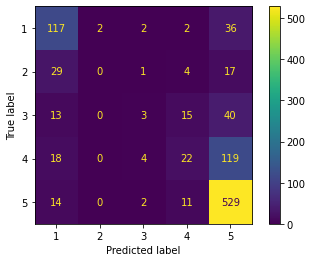

In [149]:
# Print/plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid, X_test, y_test);

The confusion matrix helps us understand the quality of the results. On the diagonal we find the quality of the predictions for a given class:
* Class 1 is found around 70 %.
* Class 2, 3 have a low score < 10%.
* Class 4 is found around 16-20 %
* Class 5 is found more than 90 %

On one line is the way the original class was found. For example for class 2 (depend the run) :
* at 59%, the predictor says that a data of this class is of class 1
* at 4% of the right class (the 2)
* at 2% of class 3
* at 4% of class 4
* at 31% of class 5
The sum is 100%.

# My own words: 

The CountVectorizer classification model,uses the CountVectorizer function to transfrom words, sentences, 
or documetns into a vector based on the frequency of each word in the document. The CountVectorizer gives a general fitted model based on the frequency a term appears in the document. It creates a matrix consting of the unique words that are represented by each column of the matrix and the frequency by values in the rows. 
This is made possible through Speech marking (POS) and Named Entity Recognition. The produced matrix is a
sparse matrix since it contains alot of zeros due to the frequency of words that dont appear in a that 
specific referenced instance. Parameters for this model include, removal of stop words, lowercase conversion, 
lemmatization or stemming, and the range of the ngram. Stop words are removed which can change the meaning or 
certain expressions and also changes the dimensionality of the data. Lowercase conversion does not change the 
dimensionaltiy of the data but converts all characters into lowercase form in an attmept to normalize data. 
Lemmatization and stemming, the former converts varainces and inflections into their base form and always produces
a known word, the latter can sometimes create new words or unkwown words due to its process of only removing suffixes
and sometimes prefixes. The ngram is important becuase it groups words together. In this case since it si based on frequency words that are appearing less frequently would be harder for the model to fit. While words that appear more frequently would show to have larger accuracy. 

It ran with ngram_range and max features, and was providing an accuracy of .53 however, in the confusion everything was zero. By removing some of new tuned parameters, the accuracy slowly increased to .66, while the confusion matrix began to show values greater than zero in the Confusion matrix cells. In this case values of 2 ,3 & 4 were the worst cases while 1 and 5 were the highest, with 5 being the greatest at 529

The Logistic Regression classification model,
